<a href="https://colab.research.google.com/github/bukolastella/Data-Science/blob/master/Data-Science/Deep%20Learning/from%20tensorflow/Copy_of_cifar10v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
tf.__version__
import os,datetime
from keras.utils.np_utils import to_categorical

### LOADING THE DATA

In [ ]:
c = tf.keras.datasets.cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = c.load_data()

In [ ]:
#Rescaling
train_images = train_images/255.
test_images = test_images/255.

In [ ]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
#Extracting our validation set
valid_images = train_images[:10000]
train_images = train_images[10000:]

In [ ]:
#Extracting our validation labels
valid_labels = one_hot_train_labels[:10000]
train_labels = one_hot_train_labels[10000:]

In [ ]:
#Checking the shape of the train datset
train_images.shape

#Having 50,000 pictures of 32 by 32 pixels

(40000, 32, 32, 3)

In [ ]:
#Checking the train labels
len(one_hot_train_labels)

#Having 50,000 labels with 

50000

In [ ]:
#Checking the shape of the test datset
test_images.shape
#Having 10,000 pictures of 32 by 32 pixels

(10000, 32, 32, 3)

In [ ]:
#Checking test labels
len(test_labels)
#Having 10,000 test labels

10000

In [ ]:
#Checking validation shape
valid_images.shape
#having 10000

(10000, 32, 32, 3)

In [ ]:
#Checking validation labels
len(valid_labels)
#Having 10,000

10000

In [ ]:
valid_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
#From the dataset
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### CHECKING OUT THE DATASET

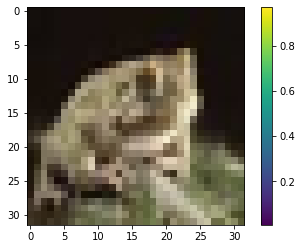

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

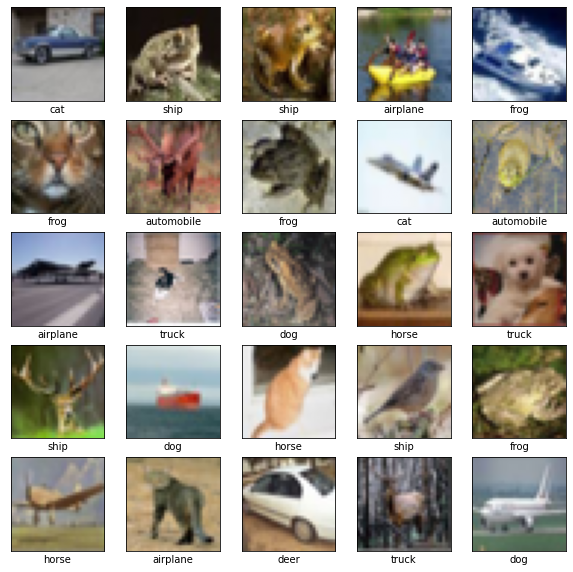

In [ ]:
#To verify correct format of the train dataset plot first 25 images

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0] ])
    
plt.show()

### PREPROCESSING

In [ ]:
train_images.shape

(40000, 32, 32, 3)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu',kernel_initializer='he_uniform', padding="same",input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.Conv2D(32, (3,3),padding="same",kernel_initializer='he_uniform', activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D( (2,2) ))
model.add(Dropout(0.2))
model.add(layers.Conv2D(64, (3,3),padding="same", kernel_initializer='he_uniform',activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3),padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(128, (3,3),padding="same",kernel_initializer='he_uniform', activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3,3),padding="same", kernel_initializer='he_uniform',activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'softmax'))



In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-3),metrics=['acc'])

In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), 'lr=1e-3, hls=512, hl=1, ac=relu, batch=128,e=100')

In [ ]:
#Callbacks
tensorboard_cb = keras.callbacks.TensorBoard(logdir,histogram_freq=1)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_second_cifar10.h5',monitor='val_loss', save_best_only=True)

In [ ]:
# create data generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,  horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(train_images, train_labels, batch_size=32)

In [ ]:
# fit model
steps = int(train_images.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data= (valid_images, valid_labels), 
                              callbacks = [tensorboard_cb,early_stopping_cb,checkpoint_cb], verbose=2)

Epoch 1/400
625/625 - 20s - loss: 1.7192 - acc: 0.3936 - val_loss: 1.4122 - val_acc: 0.4973
Epoch 2/400
625/625 - 20s - loss: 1.3442 - acc: 0.5168 - val_loss: 1.1984 - val_acc: 0.5873
Epoch 3/400
625/625 - 20s - loss: 1.1609 - acc: 0.5894 - val_loss: 1.0230 - val_acc: 0.6448
Epoch 4/400
625/625 - 20s - loss: 1.0385 - acc: 0.6305 - val_loss: 0.9192 - val_acc: 0.6837
Epoch 5/400
625/625 - 20s - loss: 0.9589 - acc: 0.6632 - val_loss: 0.9393 - val_acc: 0.6771
Epoch 6/400
625/625 - 20s - loss: 0.9044 - acc: 0.6837 - val_loss: 0.7765 - val_acc: 0.7278
Epoch 7/400
625/625 - 20s - loss: 0.8611 - acc: 0.6984 - val_loss: 0.8458 - val_acc: 0.7081
Epoch 8/400
625/625 - 20s - loss: 0.8102 - acc: 0.7180 - val_loss: 0.6632 - val_acc: 0.7718
Epoch 9/400
625/625 - 20s - loss: 0.7684 - acc: 0.7336 - val_loss: 0.7202 - val_acc: 0.7548
Epoch 10/400
625/625 - 20s - loss: 0.7620 - acc: 0.7334 - val_loss: 0.6902 - val_acc: 0.7613
Epoch 11/400
625/625 - 20s - loss: 0.7158 - acc: 0.7534 - val_loss: 0.7109 - va

In [ ]:
#history = model.fit(train_images, train_labels, batch=128, epochs= 100, validation_data = (valid_images, valid_labels),
#callbacks = [tensorboard_cb,early_stopping_cb,checkpoint_cb], verbose=2)

In [ ]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

In [ ]:
model.evaluate(test_images, one_hot_test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.4092 - acc: 0.8616


[0.4091516435146332, 0.8615999817848206]

In [ ]:
 predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[12])#Predicting the label of the class

5

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label][0].set_color('blue')

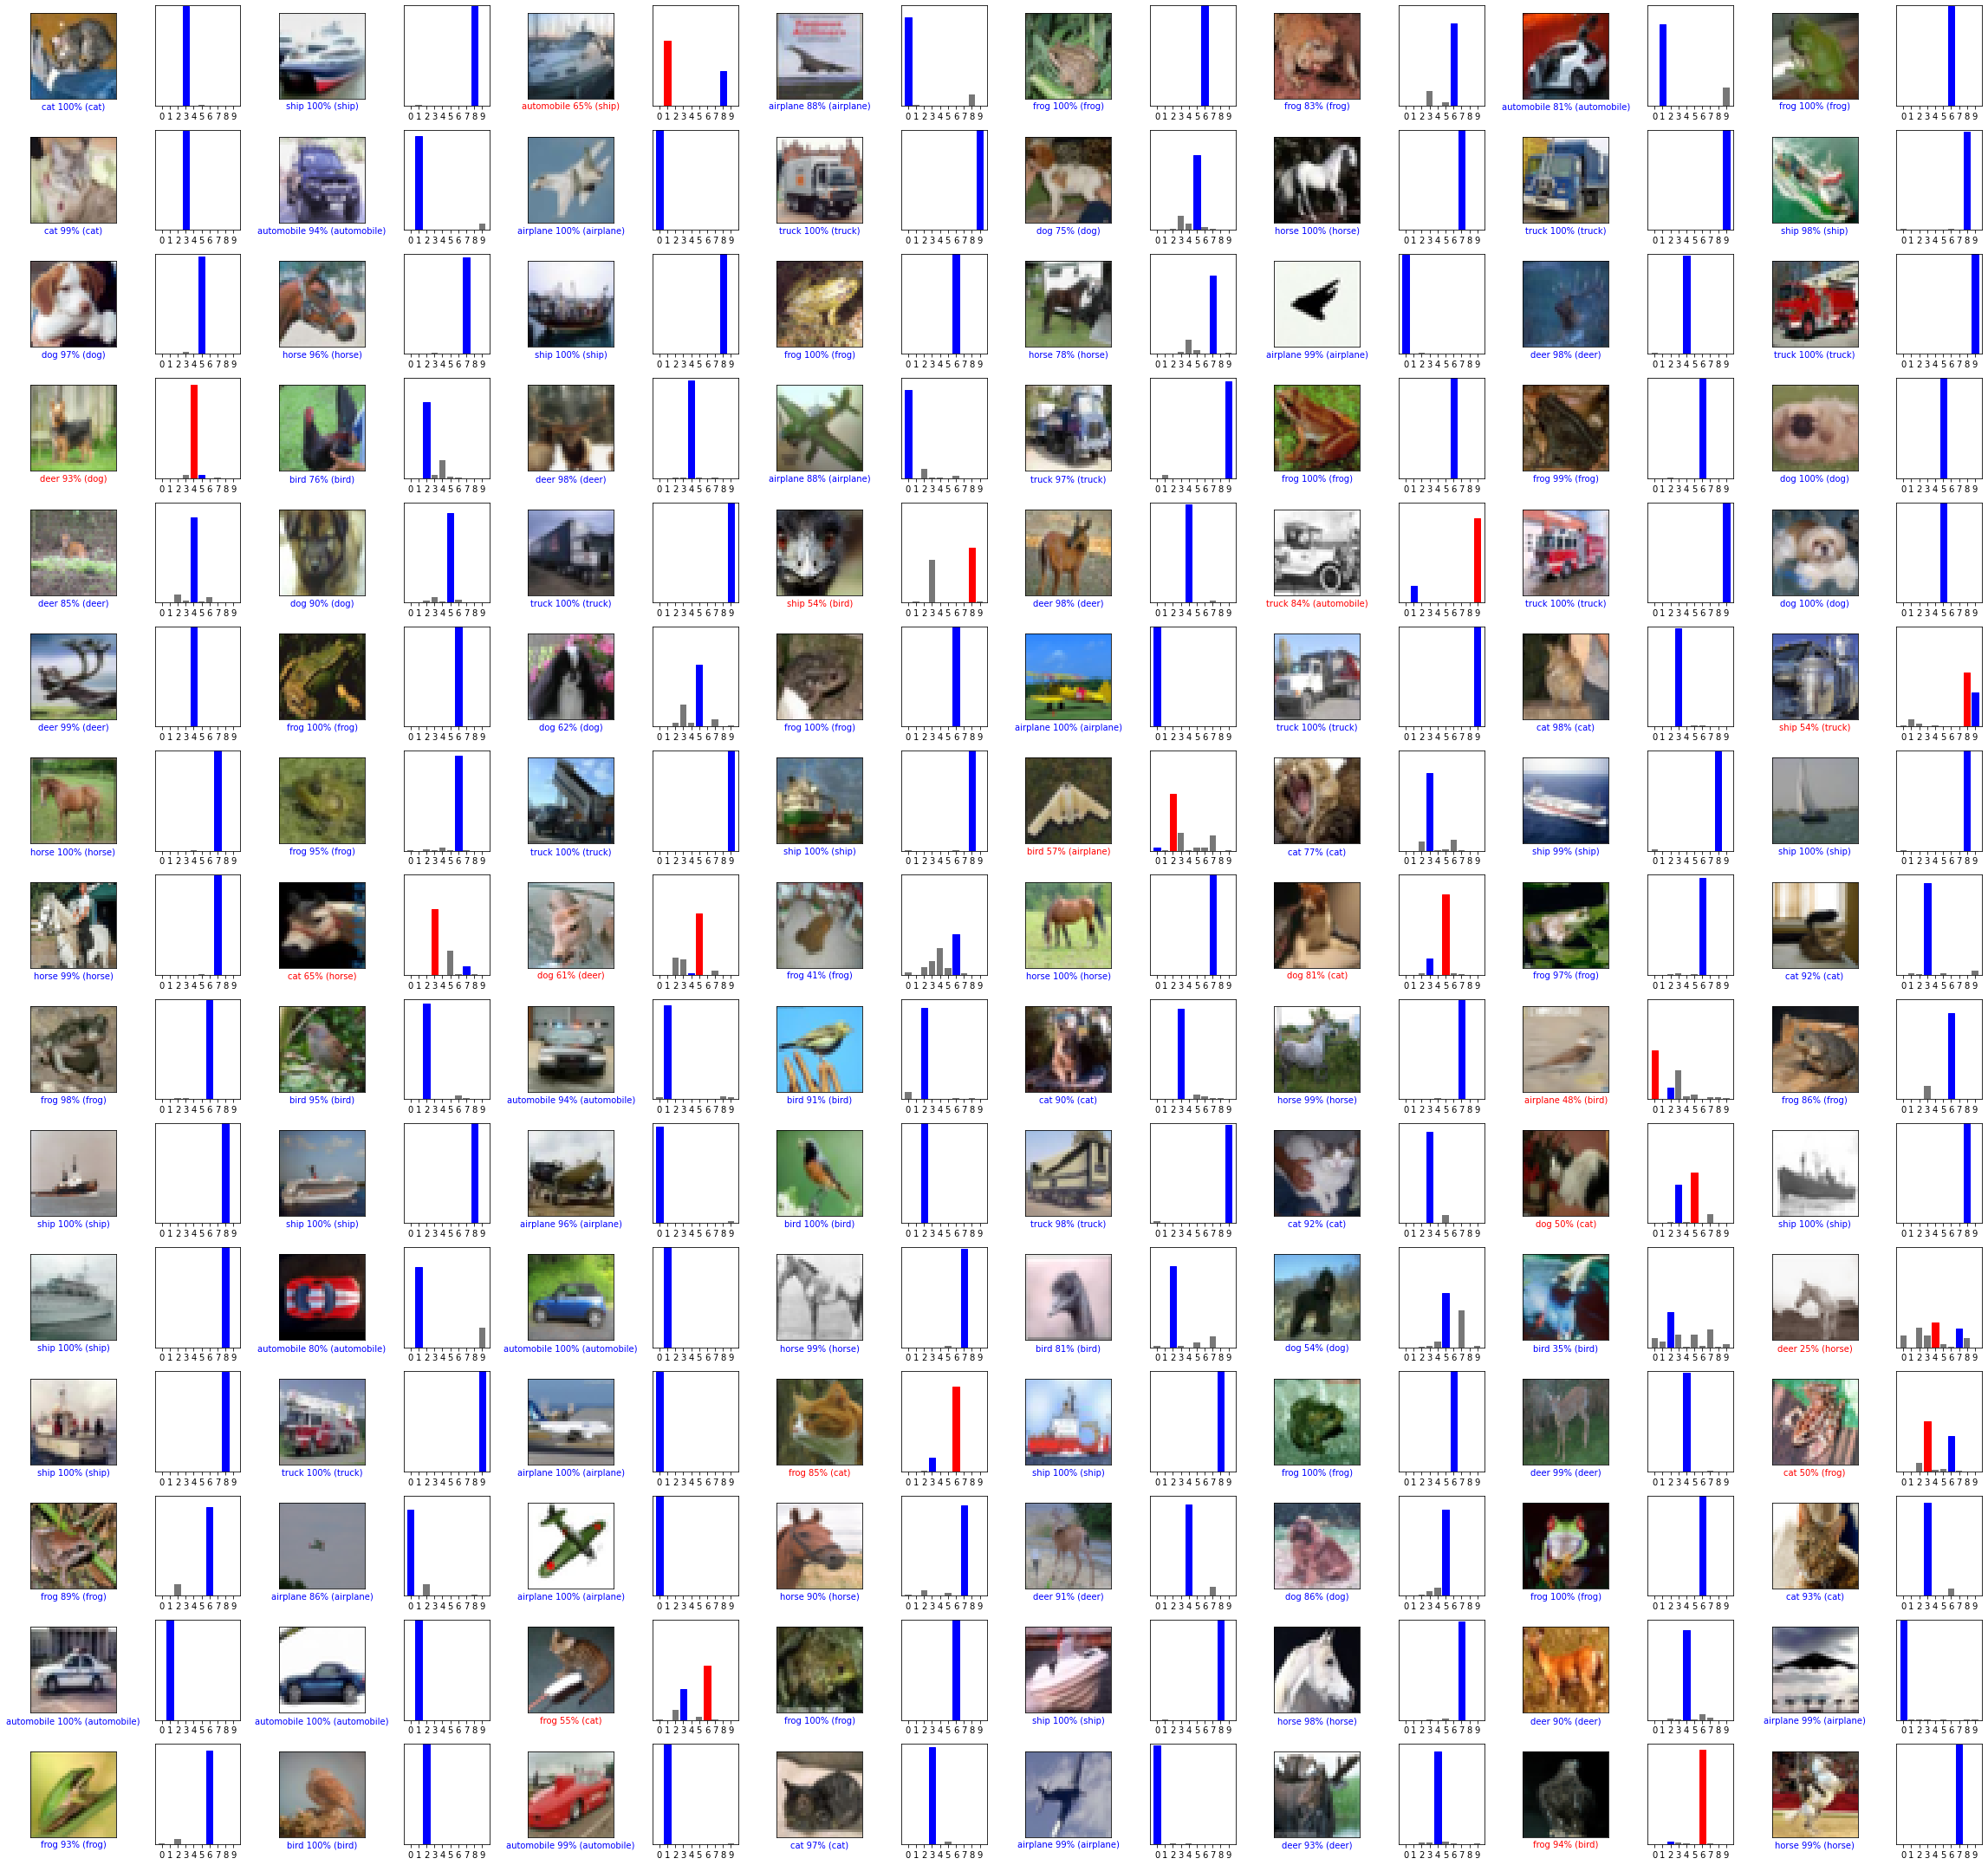

In [ ]:

#Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
import matplotlib.pyplot as plt
num_rows = 15
num_cols = 8
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
"""from google.colab import files
files.download('my_second_cifar10.h5')
"""

"from google.colab import files\nfiles.download('my_second_cifar10.h5')\n"

In [ ]:
'''
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('horse.png')
	# load model
	model = load_model('my_second_cifar10.h5')
	# predict the class
	result = model.predict_classes(img)
	print(result[0])
 
# entry point, run the example
#run_example()
'''

"\n# make a prediction for a new image.\nfrom keras.preprocessing.image import load_img\nfrom keras.preprocessing.image import img_to_array\nfrom keras.models import load_model\n \n# load and prepare the image\ndef load_image(filename):\n\t# load the image\n\timg = load_img(filename, target_size=(32, 32))\n\t# convert to array\n\timg = img_to_array(img)\n\t# reshape into a single sample with 3 channels\n\timg = img.reshape(1, 32, 32, 3)\n\t# prepare pixel data\n\timg = img.astype('float32')\n\timg = img / 255.0\n\treturn img\n \n# load an image and predict the class\ndef run_example():\n\t# load the image\n\timg = load_image('horse.png')\n\t# load model\n\tmodel = load_model('my_second_cifar10.h5')\n\t# predict the class\n\tresult = model.predict_classes(img)\n\tprint(result[0])\n \n# entry point, run the example\n#run_example()\n"